<a href="https://colab.research.google.com/github/vTheWise/speech_language_impairment_detection/blob/vs_baseline/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the drive (optional) 
- Mount the drive if the data is stored in the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installations

- Install all the required packages

In [2]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import the required packages

In [3]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Utility Functions

## Loading pickled data/features/models

In [4]:
def loadPickleData(filepath):
  data = pickle.load(open(filepath, 'rb'))
  return data

# Data Pre-Processing
- Change the file paths as needed

In [20]:
# data paths
auburnDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/auburn_disordered_features.pkl"
auburnNonDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/auburn_non_disordered_features.csv"

# read disordered data
# print("reading disordered data")
auburn_disordered_features = loadPickleData(auburnDisorderedDataPath)
print("auburn disordered data size " , len(auburn_disordered_features ))
auburn_disordered_features.head()

# read non disordered data
# print("reading non disordered data")
auburn_non_disordered_features_df = pd.read_csv(auburnNonDisorderedDataPath)
print("auburn non disordered data size " , len(auburn_non_disordered_features_df ))

# drop index column
auburn_non_disordered_features_df = auburn_non_disordered_features_df.drop(['Unnamed: 0'], axis = 1)

# add labels
auburn_disordered_features['label'] = 1
auburn_non_disordered_features_df['label'] = 0

# concat data
auburn_full_data = pd.concat([auburn_disordered_features, auburn_non_disordered_features_df], axis = 0)
print("full dataset size", len(auburn_full_data))

# set input and target variable
X = auburn_full_data.loc[:, auburn_full_data.columns != 'label']
y = auburn_full_data['label']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\ntraining dataset size", len(X_train))
print("\ntest dataset size", len(X_test))

auburn disordered data size  2022
auburn non disordered data size  5937
full dataset size 7959

training dataset size 6367

test dataset size 1592


# Train the models

In [22]:
# define classifier
xgb = XGBClassifier()

# train classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
# define classifier
nb = GaussianNB()

# train classifier
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
# define classifier
mlp = MLPClassifier()

# train classifier
mlp.fit(X_train, y_train)

MLPClassifier()

# Predictions and Model Evaluations

In [25]:
y_pred_xgb = xgb.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1165
           1       0.86      0.62      0.72       427

    accuracy                           0.87      1592
   macro avg       0.87      0.79      0.82      1592
weighted avg       0.87      0.87      0.86      1592



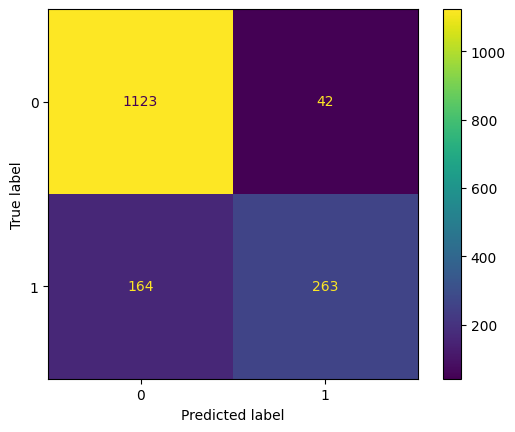

In [31]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()

In [26]:
y_pred_nb = nb.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1165
           1       0.49      0.44      0.46       427

    accuracy                           0.73      1592
   macro avg       0.64      0.63      0.64      1592
weighted avg       0.72      0.73      0.72      1592



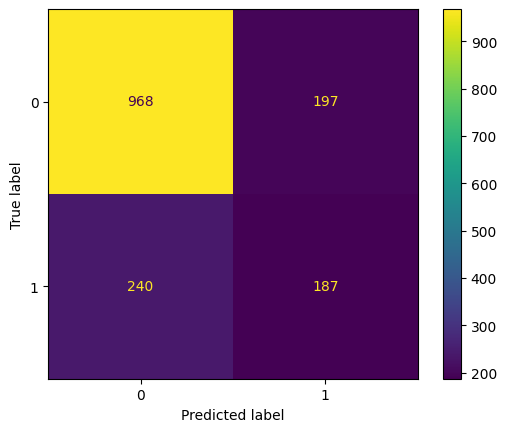

In [32]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

In [27]:
y_pred_mlp = mlp.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1165
           1       0.68      0.15      0.24       427

    accuracy                           0.75      1592
   macro avg       0.72      0.56      0.55      1592
weighted avg       0.74      0.75      0.69      1592



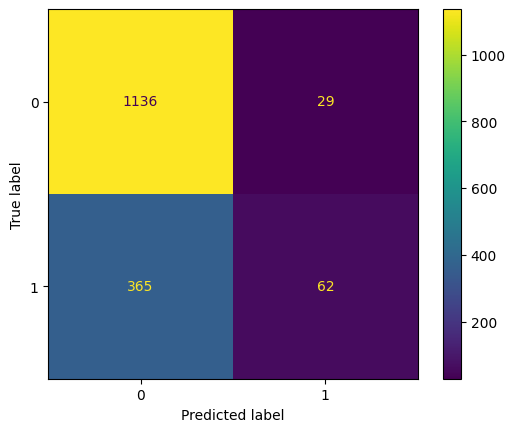

In [33]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

# Feature Importance

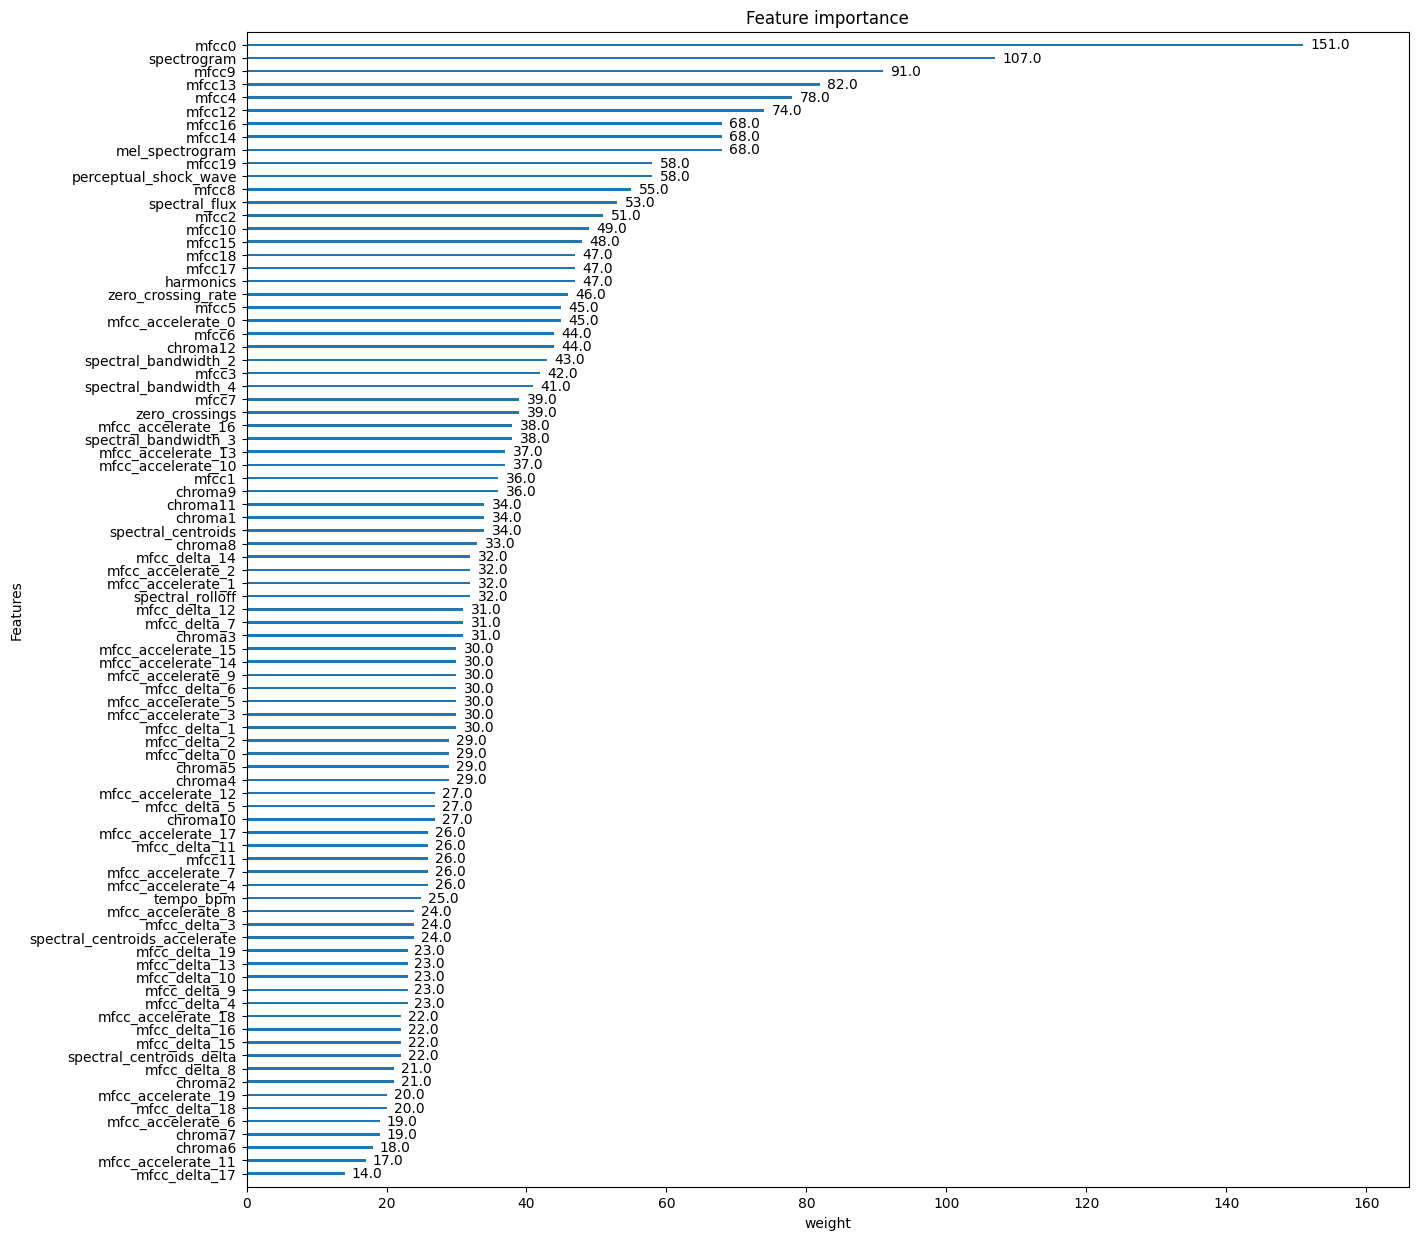

In [34]:
fig, ax = pyplot.subplots(figsize = (15,15))
plot_importance(xgb, ax = ax, grid = False, xlabel = 'weight')
pyplot.show()